In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import math
import sklearn

%matplotlib inline

In [36]:
data = pd.read_csv('linkedin data.csv', usecols = range(0,8), parse_dates=[1,7])

In [39]:
industry_mean = data.groupby('industry').mean()
industry_total = data.groupby('industry').sum()

In [41]:
top5 = industry_total.sort_values(by='employees_on_platform',ascending=False).head()

In [152]:
data

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,year
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00:00,2015
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00:00,2015
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00:00,2015
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00:00,2015
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00:00,2015
5,58382,2015-09-16,UnitedHealth Group,221288,77108,https://www.linkedin.com/company/1720,Hospital & Health Care,2015-09-16 00:00:00+00:00,2015
6,58400,2015-09-16,McKesson,128090,17520,https://www.linkedin.com/company/1900,Hospital & Health Care,2015-09-16 00:00:00+00:00,2015
7,58433,2015-09-16,BBVA,109420,40933,https://www.linkedin.com/company/4860,Banking,2015-09-16 00:00:00+00:00,2015
8,58434,2015-09-16,IBM,2542182,414139,https://www.linkedin.com/company/1009,Information Technology and Services,2015-09-16 00:00:00+00:00,2015
9,58401,2015-09-16,MasterCard,147619,9658,https://www.linkedin.com/company/3015,Information Technology and Services,2015-09-16 00:00:00+00:00,2015


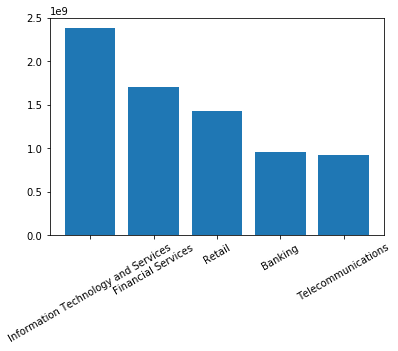

In [42]:
plt.bar(top5.index, top5['employees_on_platform'])
plt.xticks(rotation=30,rotation_mode=None)
plt.show()

In [43]:
data['year'] = [data['as_of_date'][i].year for i in range(0,len(data['as_of_date']))]
ts1 = data.groupby(['year']).sum()

In [153]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

companies = sorted(data['company_name'].unique().tolist())

selection = widgets.Dropdown(options=companies)

@interact
def show_scatter(x=selection):
    selected_company = data[data['company_name']==x]
    plt.plot(selected_company['as_of_date'],selected_company['employees_on_platform'])
    plt.show()
    print(selected_company['employees_on_platform'].mean())

interactive(children=(Dropdown(description='x', options=(' Professional Diversity Network', '1-800-FLOWERS.COM…

In [45]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

industries = data['industry'].unique().tolist()

selection2 = widgets.Dropdown(options=industries)

@interact
def show_scatter2(x=selection2):
    selected_industry = data[data['industry']==x]
    color_dict = dict(zip(sorted(selected_industry['company_name'].unique().tolist()),
                     range(0,len(sorted(selected_industry['company_name'].unique().tolist())))))
    selected_industry['color'] = [color_dict.get(x) for x in selected_industry['company_name']]
    filtered_companies = selected_industry['company_name'].unique().tolist()
    plt.scatter(selected_industry['as_of_date'], 
                selected_industry['employees_on_platform'],
                c = selected_industry['color'])
    plt.show()
    print(selected_industry['employees_on_platform'].mean())
    print(len(filtered_companies))
    print(selected_industry.groupby('company_name').mean()['employees_on_platform'].sort_values(ascending=False))

interactive(children=(Dropdown(description='x', options=('Investment Banking', 'Aviation & Aerospace', 'Pharma…

In [137]:
from fuzzywuzzy import process
import requests
import json

request_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&apikey='

API_KEY = 'VJXO967OSB6W71HO&'

request_url = request_url + API_KEY

stock_tickers = pd.read_csv('stock tickers.csv')

NYSE = stock_tickers[stock_tickers['Exchange']=='NMS']

# @interact
# def show_stock_price(x=selection):
#     listed_name = process.extract(selection.value,NYSE['Name'], limit=1)[0][0]
#     ticker_series = NYSE[NYSE['Name']==listed_name]['Ticker']
#     ticker = ticker_series[ticker_series.index[0]]
#     request_url_2 = request_url + 'symbol={}'.format(ticker)
#     response = requests.get(request_url_2)
#     stock_price =  json.loads(response.text)

#     return stock_price

selected_co = 'Amazon'

listed_name = process.extract(selected_co,NYSE['Name'], limit=1)[0][0]
ticker_series = NYSE[NYSE['Name']==listed_name]['Ticker']
ticker = ticker_series[ticker_series.index[0]]
request_url_2 = request_url + 'symbol={}'.format(ticker)
response = requests.get(request_url_2)
stock_price =  json.loads(response.text)





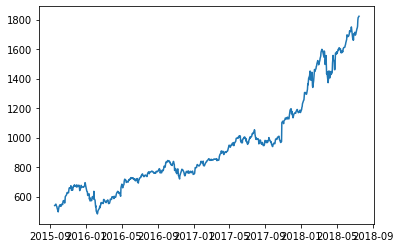

In [232]:
dates = pd.to_datetime(sorted(list(stock_price.get('Time Series (Daily)').keys())))

selected_co_dates = sorted(list(data[data['company_name']==selection.value]['as_of_date']))

min_date = min(selected_co_dates)
max_date = max(selected_co_dates)

filtered_dates = dates[(dates>min_date) & (dates<max_date)]

stock_close = [float(stock_price.get('Time Series (Daily)').get(str(x)).get('4. close')) for x in filtered_dates.date]

plt.plot(filtered_dates,stock_close)
plt.show()